In [72]:
from __future__ import annotations
try:
    from scripts_for_plotting import *
except ModuleNotFoundError:
    import sys
    sys.path.append('../')
    from scripts_for_plotting import *
import scienceplots
plt.style.use(['science', 'notebook'])

In [276]:
fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/asas-rcb-21-4/vmac_4750', sep='  ')

/tmp/ipykernel_1201383/1742306617.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  fitlist = pd.read_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/asas-rcb-21-4/vmac_4750', sep='  ')


In [277]:
fitlist

,#name_of_spectrum_to_fit,rv,teff,logg,[Fe/H],Input_vmicroturb,A(H),A(He),A(C),A(Ca),A(O),A(Na),A(S),A(Fe),A(N),A(Mg),A(Si),oisorat
0,ASAS-RCB-21.txt,0.0,4750.0,1.0,0.0,7.0,7.5,11.5,8.7,5.26,7.671,5.11,6.55,6.58,7.521,6.18,6.48,7.54


In [279]:
rats = np.arange(6,13,0.3)
rats = np.repeat(rats, 3)
rats

array([ 6. ,  6. ,  6. ,  6.3,  6.3,  6.3,  6.6,  6.6,  6.6,  6.9,  6.9,
        6.9,  7.2,  7.2,  7.2,  7.5,  7.5,  7.5,  7.8,  7.8,  7.8,  8.1,
        8.1,  8.1,  8.4,  8.4,  8.4,  8.7,  8.7,  8.7,  9. ,  9. ,  9. ,
        9.3,  9.3,  9.3,  9.6,  9.6,  9.6,  9.9,  9.9,  9.9, 10.2, 10.2,
       10.2, 10.5, 10.5, 10.5, 10.8, 10.8, 10.8, 11.1, 11.1, 11.1, 11.4,
       11.4, 11.4, 11.7, 11.7, 11.7, 12. , 12. , 12. , 12.3, 12.3, 12.3,
       12.6, 12.6, 12.6, 12.9, 12.9, 12.9])

In [280]:
len(rats)

72

In [281]:
# Extract the last row
last_row = fitlist.iloc[-1]

# Create a new DataFrame by repeating the last row n times
new_rows = pd.DataFrame([last_row] * (len(rats) - len(fitlist)), columns=fitlist.columns)

# Append the new rows to the original DataFrame
fitlist2 = pd.concat([fitlist, new_rows], ignore_index=True)

fitlist2['oisorat'] = rats
fitlist2

,#name_of_spectrum_to_fit,rv,teff,logg,[Fe/H],Input_vmicroturb,A(H),A(He),A(C),A(Ca),A(O),A(Na),A(S),A(Fe),A(N),A(Mg),A(Si),oisorat
0,ASAS-RCB-21.txt,0.0,4750.0,1.0,0.0,7.0,7.5,11.5,8.7,5.26,7.671,5.11,6.55,6.58,7.521,6.18,6.48,6.0
1,ASAS-RCB-21.txt,0.0,4750.0,1.0,0.0,7.0,7.5,11.5,8.7,5.26,7.671,5.11,6.55,6.58,7.521,6.18,6.48,6.0
2,ASAS-RCB-21.txt,0.0,4750.0,1.0,0.0,7.0,7.5,11.5,8.7,5.26,7.671,5.11,6.55,6.58,7.521,6.18,6.48,6.0
3,ASAS-RCB-21.txt,0.0,4750.0,1.0,0.0,7.0,7.5,11.5,8.7,5.26,7.671,5.11,6.55,6.58,7.521,6.18,6.48,6.3
4,ASAS-RCB-21.txt,0.0,4750.0,1.0,0.0,7.0,7.5,11.5,8.7,5.26,7.671,5.11,6.55,6.58,7.521,6.18,6.48,6.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,ASAS-RCB-21.txt,0.0,4750.0,1.0,0.0,7.0,7.5,11.5,8.7,5.26,7.671,5.11,6.55,6.58,7.521,6.18,6.48,12.6
68,ASAS-RCB-21.txt,0.0,4750.0,1.0,0.0,7.0,7.5,11.5,8.7,5.26,7.671,5.11,6.55,6.58,7.521,6.18,6.48,12.6
69,ASAS-RCB-21.txt,0.0,4750.0,1.0,0.0,7.0,7.5,11.5,8.7,5.26,7.671,5.11,6.55,6.58,7.521,6.18,6.48,12.9
70,ASAS-RCB-21.txt,0.0,4750.0,1.0,0.0,7.0,7.5,11.5,8.7,5.26,7.671,5.11,6.55,6.58,7.521,6.18,6.48,12.9


In [282]:
fitlist2.to_csv('/media/advait/DATA/research/rcb-project/TSFitPy/input_files/asas-rcb-21-4/fitlist-comb_4750', sep=' ', index=False)

In [262]:
# allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-4/Dec-03-2024-05-35-33_0.25221123590218875_LTE_O_1D/output'
allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-4/Dec-03-2024-09-38-48_0.9769274039664583_LTE_O_1D/output'
df1 = pd.read_csv(allpath, sep='\t')
# allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-4/Dec-03-2024-05-35-33_0.25221123590218875_LTE_O_1D/output'
# df2 = pd.read_csv(allpath, sep='\t')


In [263]:
# df_fine = pd.concat([df1,df2])
df_fine = df1
df_fine.sort_values(by='oisorat', inplace=True)
rats = np.unique(df_fine['oisorat'])

In [264]:
rats

array([4.5, 4.8, 5.1, 5.4, 5.7, 6. , 6.3, 6.6, 6.9, 7.2, 7.5, 7.8, 8.1,
       8.4, 8.7, 9. , 9.3, 9.6, 9.9])

In [265]:
np.max(df_fine['Doppler_Shift_add_to_RV'])

np.float64(0.3543089128594393)

In [266]:
rats

array([4.5, 4.8, 5.1, 5.4, 5.7, 6. , 6.3, 6.6, 6.9, 7.2, 7.5, 7.8, 8.1,
       8.4, 8.7, 9. , 9.3, 9.6, 9.9])

In [273]:
rats = np.unique(df_fine['oisorat'])
rats = rats[rats>6]
chis, dchis, oabunds, doabunds, rvs = [], [], [], [], []
for rat in rats:
    subdf = df_fine[df_fine['oisorat'] == rat]
    # sort by red chi squared
    subdf.sort_values(by='red_chi_squared', inplace=True)
    subdf = subdf.iloc[:2]
    meanchi = np.mean(subdf['red_chi_squared'])
    stdchi = np.std(subdf['red_chi_squared'])
    rv = np.mean(subdf['Doppler_Shift_add_to_RV'])
    meanoabund = np.mean(subdf['O_Fe'])
    stdoabund = np.std(subdf['O_Fe'])
    meanrv = np.mean(rv)
    chis.append(meanchi)
    dchis.append(stdchi)
    oabunds.append(meanoabund)
    doabunds.append(stdoabund)
    rvs.append(meanrv)

/tmp/ipykernel_1201383/92325999.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subdf.sort_values(by='red_chi_squared', inplace=True)


In [274]:
rats

array([6.3, 6.6, 6.9, 7.2, 7.5, 7.8, 8.1, 8.4, 8.7, 9. , 9.3, 9.6, 9.9])

8.55 -1.82 -1.88


Text(0.5, 0, '16O/18O ratio')

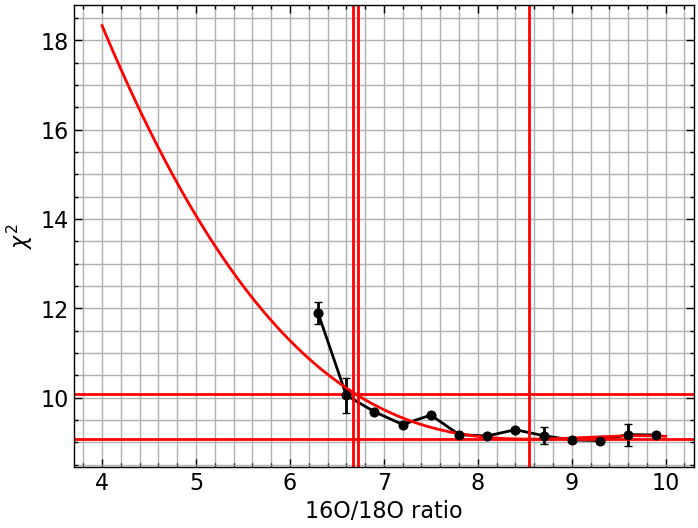

In [275]:
plt.plot(rats, chis, 'ko-')
plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
# plt.axhline(np.min(chis), ls='--', color='r')
# plt.axhline(np.min(chis)+1.0, ls='--', color='r')
# plt.axvline(3.4)
plt.grid(which='both')

# fit a 3rd degree polynomial weighted by the errors
p = np.polyfit(rats, chis, 4, w=1/np.array(dchis))
x = np.linspace(4,10,100)
y = np.polyval(p, x)
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')
# find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y-ybound)
idx = np.where(diff == np.min(diff))
# find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx]-xfit).round(2), (x[idx2]-xfit).round(2)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')
print(xfit[0].round(2), xbounds[0][0], xbounds[1][0])
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# find x values nearest to ybounds


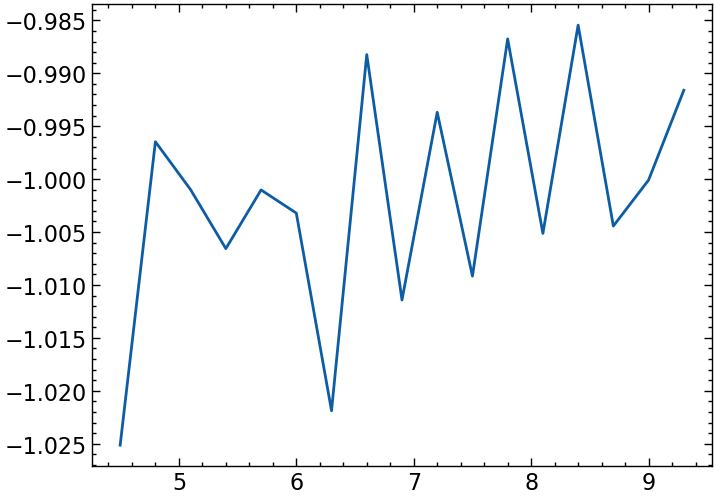

In [195]:
plt.plot(rats, oabunds)

7.52 4.19 -2.5


Text(0.5, 0, '16O/18O ratio')

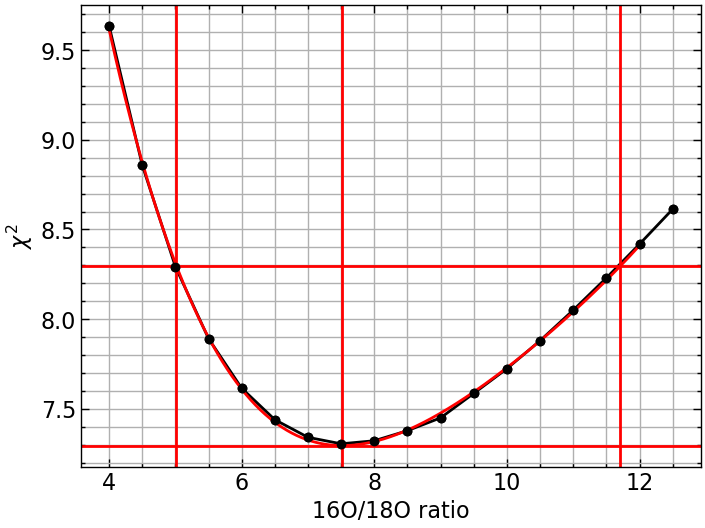

In [106]:
plt.plot(rats, chis, 'ko-')
plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
# plt.axhline(np.min(chis), ls='--', color='r')
# plt.axhline(np.min(chis)+1.0, ls='--', color='r')
# plt.axvline(3.4)
plt.grid(which='both')

# fit a 3rd degree polynomial weighted by the errors
p = np.polyfit(rats, chis, 4)
x = np.linspace(4,12,1000)
y = np.polyval(p, x)
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')
# find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y-ybound)
idx = np.where(diff == np.min(diff))
# find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx]-xfit).round(2), (x[idx2]-xfit).round(2)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')
print(xfit[0].round(2), xbounds[0][0], xbounds[1][0])
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# find x values nearest to ybounds


0.116 -0.038 0.05


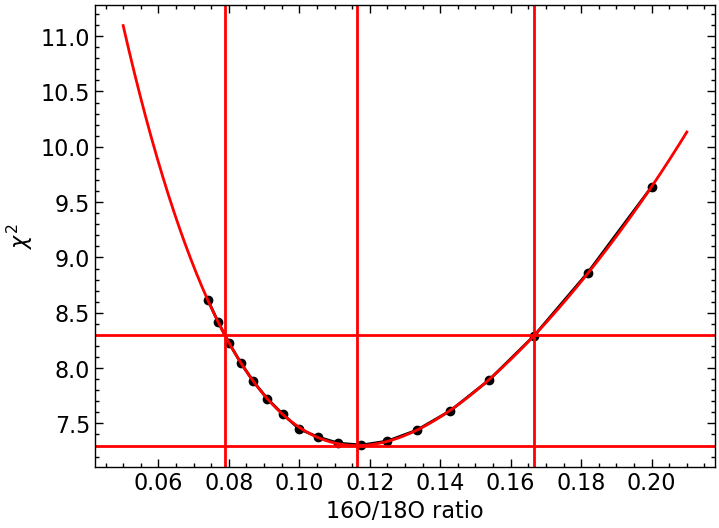

In [107]:
o18rats = 1/(1+rats)
plt.plot(o18rats, chis, 'ko-')
p = np.polyfit(o18rats, chis, 4)

# Evaluate the polynomial fit on a logarithmic scale
x = np.linspace(0.05, 0.21, 500)
y = np.polyval(p, x)

# Convert x back to the original scale for plotting
# x_original = np.exp(x)

# Plot the polynomial fit
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')

# Find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y - ybound)
idx = np.where(diff == np.min(diff))
# Find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx] - xfit).round(3), (x[idx2] - xfit).round(3)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')

print(xfit[0].round(3), xbounds[0][0], xbounds[1][0])

# Label the axes
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# plt.xscale('log')
# xs = np.linspace(np.log(300), np.log(800), 10)
# plt.plot(np.exp(xs), np.polyval(p, (xs)), 'k.')
plt.show()

In [39]:
o16rats = rats/(1+rats)
o16s =  (8.77 + np.array(oabunds)) + np.log(o16rats)

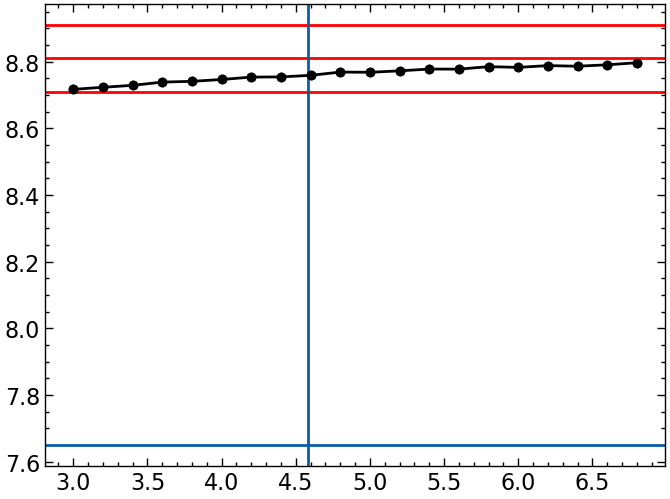

In [93]:
plt.plot(rats, np.array(oabunds)+8.77, 'ko-')
plt.errorbar(rats, np.array(oabunds)+8.77, yerr=doabunds, fmt='ko', capsize=3)
plt.axhline(8.77-1.12)
plt.axhline(8.81, color='r')
plt.axhline(8.81-0.1, color='r')
plt.axhline(8.81+0.1, color='r')
plt.axvline(4.58)

In [56]:
allpath = '/media/advait/DATA/research/rcb-project/TSFitPy/output_files/asas-rcb-21-2/Oct-16-2024-04-44-54_0.014775651587911276_LTE_O_1D/output'
df1 = pd.read_csv(allpath, sep='\t')
# df_fine = pd.concat([df1,df2])
df_fine = df1
df_fine.sort_values(by='oisorat', inplace=True)
rats = np.unique(df_fine['oisorat'])
rats = np.unique(df_fine['oisorat'])
chis, dchis, oabunds, doabunds = [], [], [], []
for rat in rats:
    subdf = df_fine[df_fine['oisorat'] == rat]
    meanchi = np.mean(subdf['red_chi_squared'])
    stdchi = np.std(subdf['red_chi_squared'])
    meanoabund = np.mean(subdf['O_Fe'])
    stdoabund = np.std(subdf['O_Fe'])
    chis.append(meanchi)
    dchis.append(stdchi)
    oabunds.append(meanoabund)
    doabunds.append(stdoabund)

5.85 0.58 -0.67


Text(0.5, 0, '16O/18O ratio')

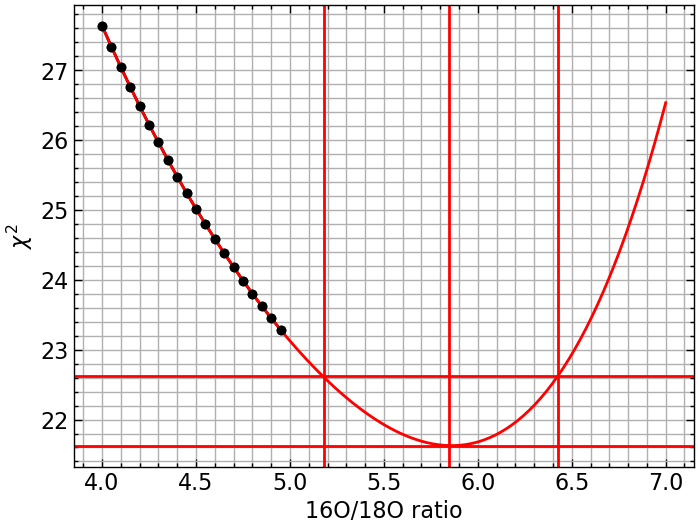

In [57]:
plt.plot(rats, chis, 'ko-')
plt.errorbar(rats, chis, yerr=dchis, fmt='ko', capsize=3)
# plt.axhline(np.min(chis), ls='--', color='r')
# plt.axhline(np.min(chis)+1.0, ls='--', color='r')
# plt.axvline(3.4)
plt.grid(which='both')

# fit a 3rd degree polynomial weighted by the errors
p = np.polyfit(rats, chis, 4, w=1/np.array(dchis))
x = np.linspace(4,7,100)
y = np.polyval(p, x)
plt.plot(x, y, 'r')
plt.axvline(x[np.where(y == np.min(y))], color='r')
xfit = x[np.where(y == np.min(y))]
plt.axhline(np.min(y), color='r')
# find nearest x value to min + 1 y value
ybound = np.min(y) + 1.0
diff = np.abs(y-ybound)
idx = np.where(diff == np.min(diff))
# find the index of next minimum
idx2 = np.where(diff == np.partition(diff, 1)[1])
xbounds = (x[idx]-xfit).round(2), (x[idx2]-xfit).round(2)
plt.axvline(x[idx], color='r')
plt.axvline(x[idx2], color='r')
plt.axhline(ybound, color='r')
print(xfit[0].round(2), xbounds[0][0], xbounds[1][0])
plt.ylabel(r'$\chi^2$')
plt.xlabel("16O/18O ratio")
# find x values nearest to ybounds
